In [1]:
import gaussian_mixture_anomaly_detection as ad
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import numpy as np
import utils
import models
import ewma

reload(ad)
reload(utils)
reload(models)
reload(ewma)
%matplotlib inline

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
eff_train = utils.read_ts('data/eff_train/eff_train1.csv')
eff_train = utils.bad_to_mean(eff_train)
eff_train.head()

/Users/sergmiller/Documents/code/python/sibur/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good


,tag,timestamp,value,quality
0,Efficiency,01.10.2016 0:00,16137.70,Good
1,Efficiency,01.10.2016 0:00,16060.55,Good
2,Efficiency,01.10.2016 0:00,16633.79,Good
3,Efficiency,01.10.2016 0:00,17578.13,Good
4,Efficiency,01.10.2016 0:00,17331.05,Good


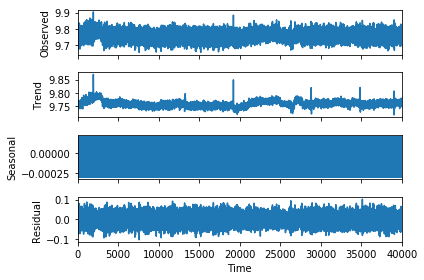

4000


,trend,season,diff
30,9.762740,-0.000053,0.000724
31,9.753068,0.000001,-0.002822
32,9.745222,0.000040,0.001152
33,9.754340,0.000208,0.001027


In [6]:
origin_ts = eff_train[' value'][40000:80000].values
# plt.plot(range(len(origin_ts)), origin_ts)
lag_to_drop=10
df = utils.get_expanded_features(origin_ts,lag_to_drop=10,plot=True)
dropped_origin = utils.get_dropped(origin_ts, lag=10)
print(len(df))
df.loc[30:33]

In [7]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
def get_log_reg_score(target,values,model=LogisticRegression(),X_length = 50):
    print('train----------------------------test')
    print('diff', models.train_test_score(model, np.abs(values), target, length=X_length))

remove last elements until period


  3%|▎         | 2/60 [00:00<00:03, 16.19it/s]

Start probabilities memorization


100%|██████████| 60/60 [00:03<00:00, 18.48it/s]
/Users/sergmiller/Documents/code/python/sibur/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=10,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


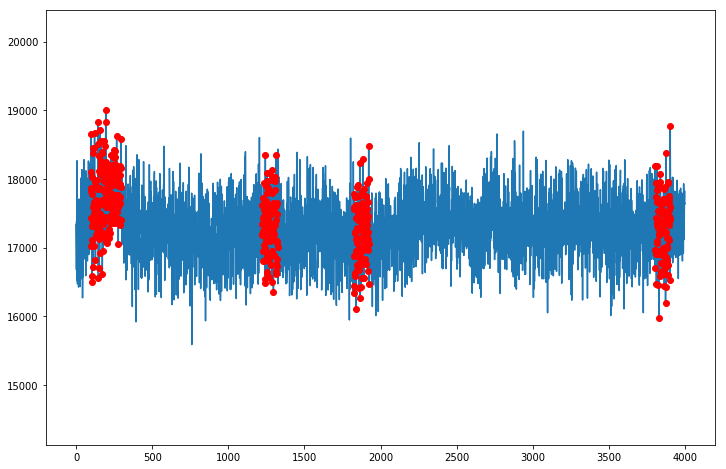

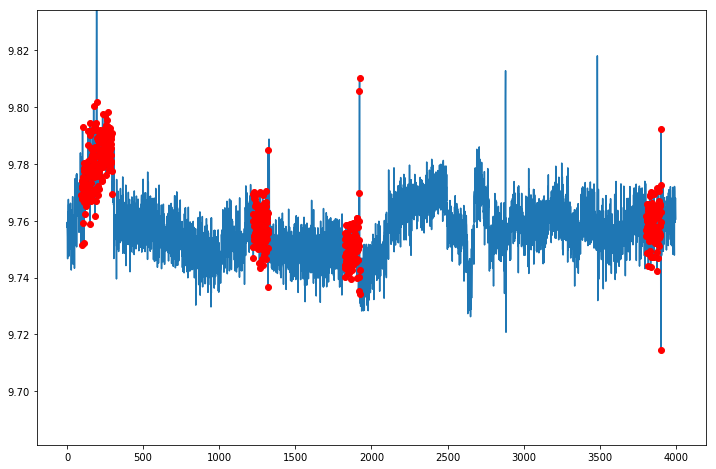

(0.72551584588449647, 0.39042285714285713, 1.0, 1.0)
CPU times: user 11.2 s, sys: 854 ms, total: 12.1 s
Wall time: 13.3 s


In [8]:
%%time
# 1 hour predictions
targets = utils.get_targets_with_mixture(df, horizont=100, T= 11 * 6, halflife=10,
                                         top=0.01)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
print(models.train_test_run(LogisticRegression(), 
                            Ridge(), 
                            df, np.zeros(df.shape[0]), targets, length=100,
                           ))

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
  0%|          | 0/1 [00:00<?, ?it/s]

Start probabilities memorization


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
/Users/sergmiller/Documents/code/python/sibur/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=10,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


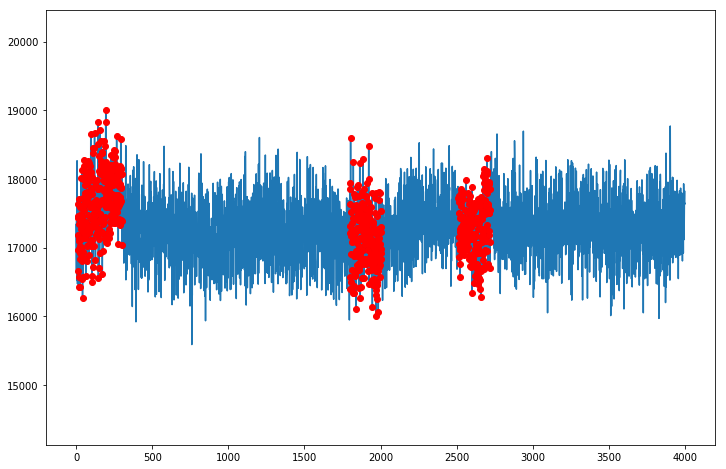

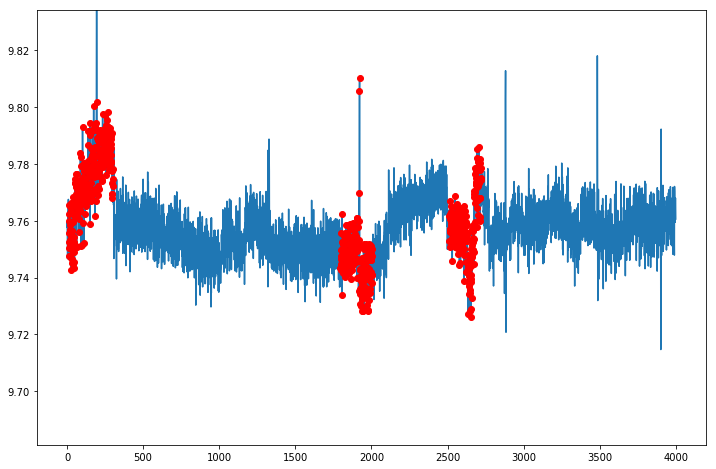

TypeError: get_log_reg_score() missing 1 required positional argument: 'values'

In [9]:
%%time
# 1 hour predictions
targets = utils.get_targets_with_mixture(df[['trend']],horizont=2 * 6 * 11,halflife=10,top=0.05)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
print(get_log_reg_score(targets))

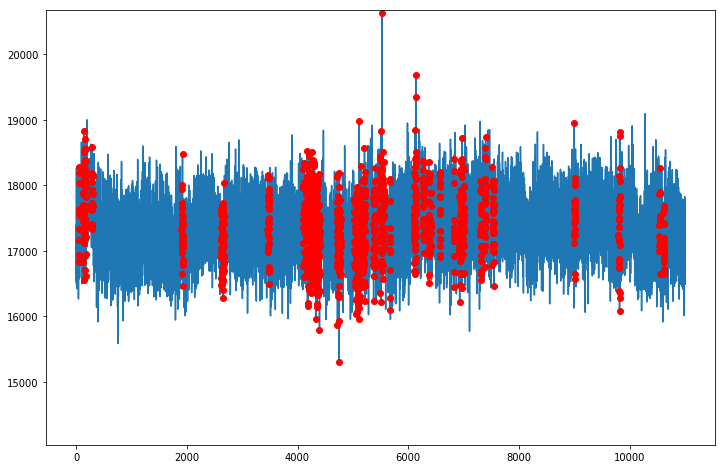

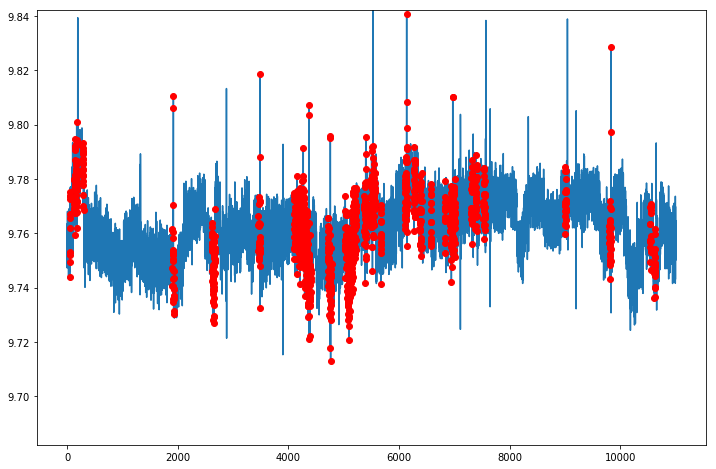

train----------------------------test
diff (0.65626693529287961, 0.6978348439073514)
None
CPU times: user 1.01 s, sys: 25.3 ms, total: 1.03 s
Wall time: 1.04 s


In [116]:
%%time
df[['trend']].shape
dropped_origin.shape
targets = ewma.get_target_future(df[['trend']],horizont= 6 * 11, top=0.4 , halflife=6)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
print(get_log_reg_score(targets))

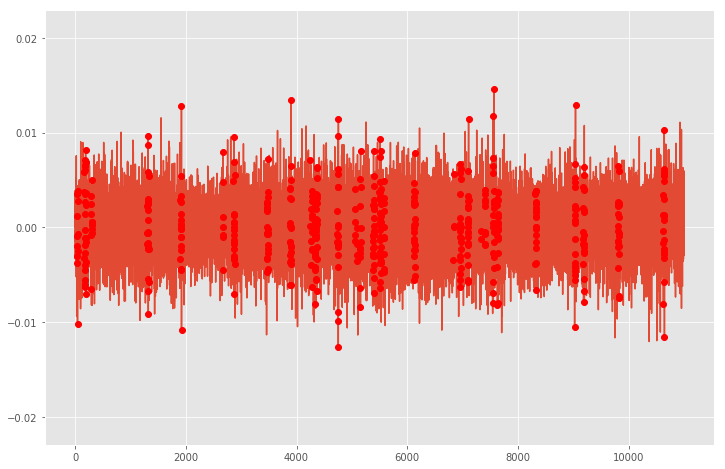

(0.66494323866425031, 0.6478952119526169)


In [160]:
values = df['diff'].values
targets = ewma.get_ma_target(df,window=20)
utils.plot_with_target(values, targets)
print(utils.get_model_score(targets,np.abs(values)))

In [153]:
score,proba = utils.get_model_score(targets, np.abs(values),X_length = 50,return_proba=True)
print(score)

(0.66494323866425031, 0.6478952119526169)


In [161]:
proba_all = np.concatenate(proba)

ValueError: Invalid RGBA argument: 0.94658409042602309

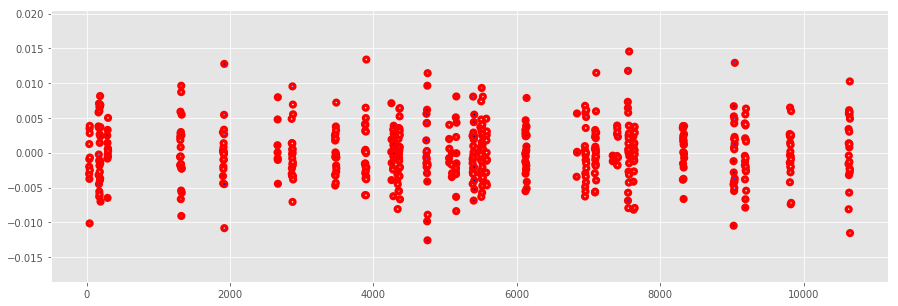

In [163]:
utils.plot_targets_colored(values, targets, proba_all ,size=10)
plt.xlim(0,100)
plt.show()

# End to end

### Efficiency

Reading data from "data/eff_train/eff_train1.csv"...
TSA decomposition...

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)



lag_to_drop 70
Start probabilities memorization

100%|██████████| 1/1 [00:07<00:00,  8.00s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=10,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


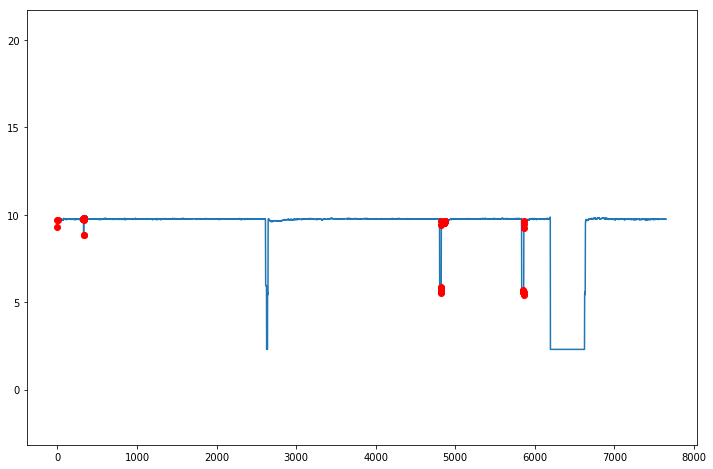

train---------------------------test
(0.75803104290198808, 0.50013262599469499)
CPU times: user 1min 2s, sys: 1.52 s, total: 1min 4s
Wall time: 1min 4s


In [119]:
%%time 
score = utils.end_to_end('data/eff_train/eff_train1.csv',plot=True)
print('train---------------------------test')
print(score)

Reading data from "data/qual_train/qual_train1.csv"...
TSA decomposition...
lag_to_drop 1
Start probabilities memorization

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
100%|██████████| 1/1 [00:01<00:00,  1.62s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=1,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


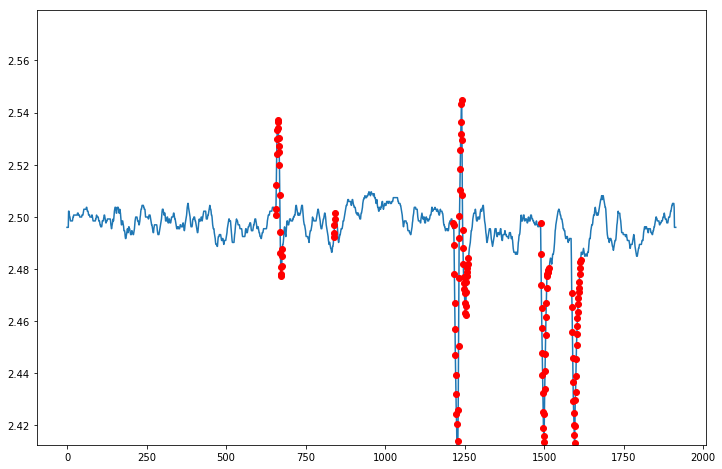

train---------------------------test
(0.60903628887380723, 0.96290392072382591)


In [120]:
score = utils.end_to_end('data/qual_train/qual_train1.csv',plot=True,lag_to_drop=1,horizont=4,halflife=1,X_length=10,top=0.05)
print('train---------------------------test')
print(score)

Reading data from "data/energy_cons_train/Energy_cons_train1.csv"...
TSA decomposition...

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)



lag_to_drop 20
Start probabilities memorization

100%|██████████| 1/1 [00:01<00:00,  1.88s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=10,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


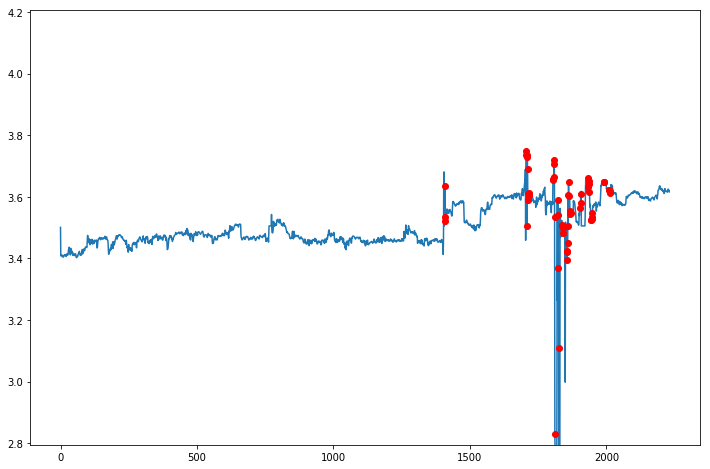

train---------------------------test
(1.0, 0.66475078026018974)


In [121]:
score = utils.end_to_end('data/energy_cons_train/Energy_cons_train1.csv',
                         plot=True,
                         lag_to_drop=20,
                         horizont=60,
                         halflife = 10,
                         X_length=80,
                         top=0.02)
print('train---------------------------test')
print(score)

Reading data from "data/joined/eff.train.csv"...
TSA decomposition...

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)



lag_to_drop 20
Start probabilities memorization

100%|██████████| 1/1 [03:41<00:00, 221.63s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=10,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


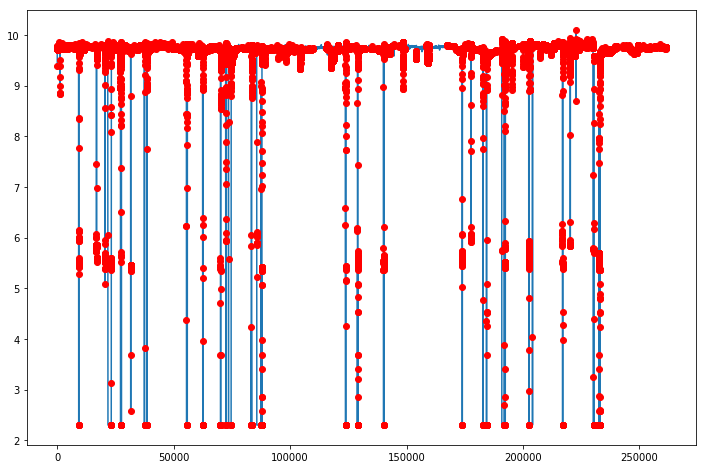

test---------------------------train
(0.60414167862409451, 0.47987863642617956)
CPU times: user 31min 40s, sys: 29.1 s, total: 32min 9s
Wall time: 32min 11s


In [70]:
%%time 
score = utils.end_to_end('data/joined/eff.train.csv',plot=True,lag_to_drop=20,horizont=2*60,halflife=10,X_length=70,top=0.03)
print('train---------------------------test')
print(score)